# Introdução

Com este projeto de Dados, visou-se aplicar os conhecimentos adquiridos sobre análise exploratória de dados, passando pela limpeza e organização inicial até análise das variáveis envolvidas.<br>
Para esse estudo, foram aplicadas técnicas de estatística descritiva e vizualização de dados.

O projeto consiste em investigar o perfil de clientes de um banco que entraram em default. Os dados foram obtidos na plataforma Kaggle, como indicado nas partes seguintes.<br>
Alguns pontos levantados e construídos ao longo do projeto:
- A quantia de valores faltantes que podem modificar a interpretação de algumas variáveis.

- O comportamento de variáveis quantitativas apresentando possíveis outliers em grande quantidade.

- Destacou-se, ainda, variáveis que apresentam mais mudanças em relação ao limite de crédito disponível, essa sendo uma das variáveis disponíveis no Dataset, visto que quanto mais limites, maiores podem ser os impactos para a empresa.

Ao final, são elencados tópicos observados sobre os clientes em default nesse conjunto de dados.

Ficou em aberto o estudo referente à algumas variáveis, que apresentam grande número de candidatos a outliers e carecem aprofundamento.<br>
No bloco final, dedicado às conclusões, são expostas algumas questões que podem nortear um estudo futuro desses pontos faltantes.

## Preparações iniciais - Bibliotecas e Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credito.csv')

# Conhecendo o Dataset

### Fonte

O conjunto de dados explorado nessa análise está disponível originalmente na plataforma Kaggle e [pode ser acessado clicando aqui](https://www.kaggle.com/datasets/srgiolutzer/limite-de-crdito-bancrio/data).

In [3]:
# Vizualizando o dataset para impressões iniciais

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### Descrição segundo a fonte:

Este dataset contém informações de perfil e comportamento de clientes de um banco, incluindo detalhes demográficos e dados relacionados à atividade bancária. O objetivo é fornecer insights sobre os fatores que podem influenciar o padrão de default (inadimplência) dos clientes.

Os dados estão organizados em várias colunas, cada uma representando uma variável diferente, conforme descrito abaixo:

- id: Identificador único para cada cliente.
- default: Uma variável binária indicando se o cliente entrou em default (1 para sim, 0 para não).
- idade: A idade do cliente em anos.
- sexo: O gênero do cliente.
- dependentes: Número de dependentes que o cliente possui.
- escolaridade: Nível de escolaridade do cliente.
- estado_civil: Estado civil do cliente.
- salario_anual: Renda anual do cliente.
- tipo_cartao: Tipo de cartão de crédito que o cliente possui.
- meses_de_relacionamento: Quantidade de meses que o cliente tem um relacionamento com o banco.
- qtd_produtos: Quantidade de produtos que o cliente tem com o banco.
- iteracoes_12m: Quantidade de interações que o cliente teve com o banco nos últimos 12 meses.
- meses_inativo_12m: Quantidade de meses que o cliente esteve inativo nos últimos 12 meses.
- limite_credito: Limite de crédito do cliente.
- valor_transacoes_12m: Valor total das transações que o cliente fez nos últimos 12 meses.
- qtd_transacoes_12m: Quantidade total de transações que o cliente fez nos últimos 12 meses.

Estes dados podem ser usados para construir modelos de machine learning para prever a probabilidade de um cliente entrar em default, possibilitando ao banco tomar medidas preventivas. Além disso, pode-se realizar uma análise exploratória para entender melhor o perfil dos clientes e identificar padrões e tendências.

### Verificações e tratamentos iniciais

Nessa etapa, serão verificadas as estruturas do conjunto de dados, a formatação das informações e adequação das anotações como preparação para a análise.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Ao verificar as informações desse DataFrame, é perceptível que:
- Não há problemas no index;
- Não há dados nulos em todo o DataFrame;
- Há necessidade de tratamento em duas colunas: 'limite_credito' e 'valor_transacoes_12m'
    - Valores são numéricos do tipo float, porém por haver vírgula, foram interpretados como object

In [5]:
# Verificando a padronização das anotações das colunas categóricas.
    # Exemplo: em estado civil, há "casado", "casada" e "casada(o)"?

for col in df[['default', 'sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']].columns:
  print(f'Coluna: {col}')
  print(df[col].unique(), '\n')

Coluna: default
[0 1] 

Coluna: sexo
['M' 'F'] 

Coluna: escolaridade
['ensino medio' 'mestrado' 'sem educacao formal' 'na' 'graduacao'
 'doutorado'] 

Coluna: estado_civil
['casado' 'solteiro' 'na' 'divorciado'] 

Coluna: salario_anual
['$60K - $80K' 'menos que $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'na'] 

Coluna: tipo_cartao
['blue' 'gold' 'silver' 'platinum'] 



Com essa última verificação, observa-se que:
- Essas colunas apresentam informações padronizadas;
- As colunas 'escolaridade', 'estado_civil' e 'salario_anual' apresentam o valor **'na'**, indicando a falta da informação.

In [6]:
df.isna().sum()

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

Ao verificar a presença dos valores 'na' ao longo de todo o dataframe, conclui-se que eles foram preenchidos propositalmente como 'na'.

In [7]:
# Para confirmar se somente as três colunas mencionas possuem valores 'na':

df.isin(['na']).sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

Esses valores 'na' não necessariamnete impactarão nas análises feitas. Portanto, serão mantidos no DataFrame. <br>
Vale ressaltar que são informações que não permitem inferência a partir das demais colunas, logo, caso haja necessidade de removê-los, assim será feito, mas, por hora, serão mantidos para preservar as demais informações de suas linhas.

#### Tratando as colunas 'limite_credito' e 'valor_transacoes_12m'

In [8]:
# Retomando as necessidades de tratamento:

df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [9]:
df[['limite_credito', 'valor_transacoes_12m']] = df[['limite_credito', 'valor_transacoes_12m']].map(lambda x: x.replace('.', '')).map(lambda x: x.replace(',', '.')).astype(float)
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


## Conhecendo o Dataset - Conclusão

Após as verificações e tratamentos, o dataset está pronto para ser analisado e os possíveis percalços com os valores 'na' já foram evidenciados.

In [10]:
# Confirmando as alterações

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  int64  
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             10127 non-null  object 
 6   estado_civil             10127 non-null  object 
 7   salario_anual            10127 non-null  object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_transacoes_12m  

In [11]:
# Visão geral do DataFrame revisado

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28


# Objetivos da análise

Compreender o perfil de clientes que entraram em ***default***, identificando padrões de comportamento e características desses clientes.
- Explorar cada variável separadamente.
- Relacionar as variáveis.


# Exploração univariada das variáveis

Nessa etapa, as variáveis presentes no Dataset serão analisadas para a identificação de padrões e geração de insights.

In [12]:
# Explorando a coluna default

print(f'Valores únicos da variável: {df.default.unique()} \n')

clientes_default = df['default'].sum()
print(f'Total de clientes em default: {clientes_default}\n')

porcentagem_default = round((clientes_default / df.shape[0] * 100), 2)
print(f'Clientes em default representam {porcentagem_default}% do total de clientes.')

Valores únicos da variável: [0 1] 

Total de clientes em default: 1627

Clientes em default representam 16.07% do total de clientes.


Com essa análise, percebe-se que há percentual considerável de clientes em ***default***.
> Vale ressaltar que, nas informações sobre o Dataset, não consta o percentual tolerável de clientes em ***default***.

In [13]:
# Destacando o DataFrame apenas de clientes em default

df_default = df.loc[df['default'] == 1].copy()
df_default.reset_index(drop = True, inplace = True)

# Coluna Id não agrega para essa análise, portanto será retirada.
df_default.drop('id', axis = 1, inplace = True)

# Como esse dataframe é constituido apenas de clientes em default, a coluna default também não agrega para essa análise
df_default.drop('default', axis = 1, inplace = True)

df_default.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,62,F,0,mestrado,casado,menos que $40K,blue,49,2,3,3,1438.73,692.25,16
1,66,F,0,doutorado,casado,na,blue,56,5,3,4,7882.47,704.78,16
2,54,F,1,mestrado,casado,menos que $40K,blue,40,2,1,3,1438.08,705.59,19
3,56,M,2,mestrado,casado,$120K +,blue,36,1,3,3,15769.34,602.60,15
4,48,M,2,mestrado,casado,$60K - $80K,silver,35,2,4,4,34516.60,691.10,15


Com o destaque dos clientes em Default, é válida uma análise geral dos dados

In [14]:
# Visão geral dos dados numéricos

df_default.describe().round(2)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00
mean,46.66,2.40,36.18,3.28,2.97,2.69,8136.52,3095.52,44.93
std,7.67,1.28,7.80,1.58,1.09,0.90,9095.35,2308.21,14.57
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.00,510.16,10.00
25%,41.00,2.00,32.00,2.00,2.00,2.00,2114.19,1904.07,37.00
50%,47.00,2.00,36.00,3.00,3.00,3.00,4178.03,2329.24,43.00
75%,52.00,3.00,40.00,5.00,4.00,3.00,9933.67,2772.62,51.00
max,68.00,5.00,56.00,6.00,6.00,6.00,34516.98,10583.79,94.00


Os valores encontrados nas colunas numéricas seguem, de forma geral, comportamento adequado para o contexto.

As colunas 'limite_credito', 'valor_trasacoes_12m' e 'qtd_trasacoes_12m' apresentem valores máximos que valem ser investigados como possíveis outliers devido distanciamento do terceiro quartil e do efeito que causam na média.

Para tal serão analisados boxplots dessas colunas.

Text(0, 0.5, 'Qtd transações 12m')

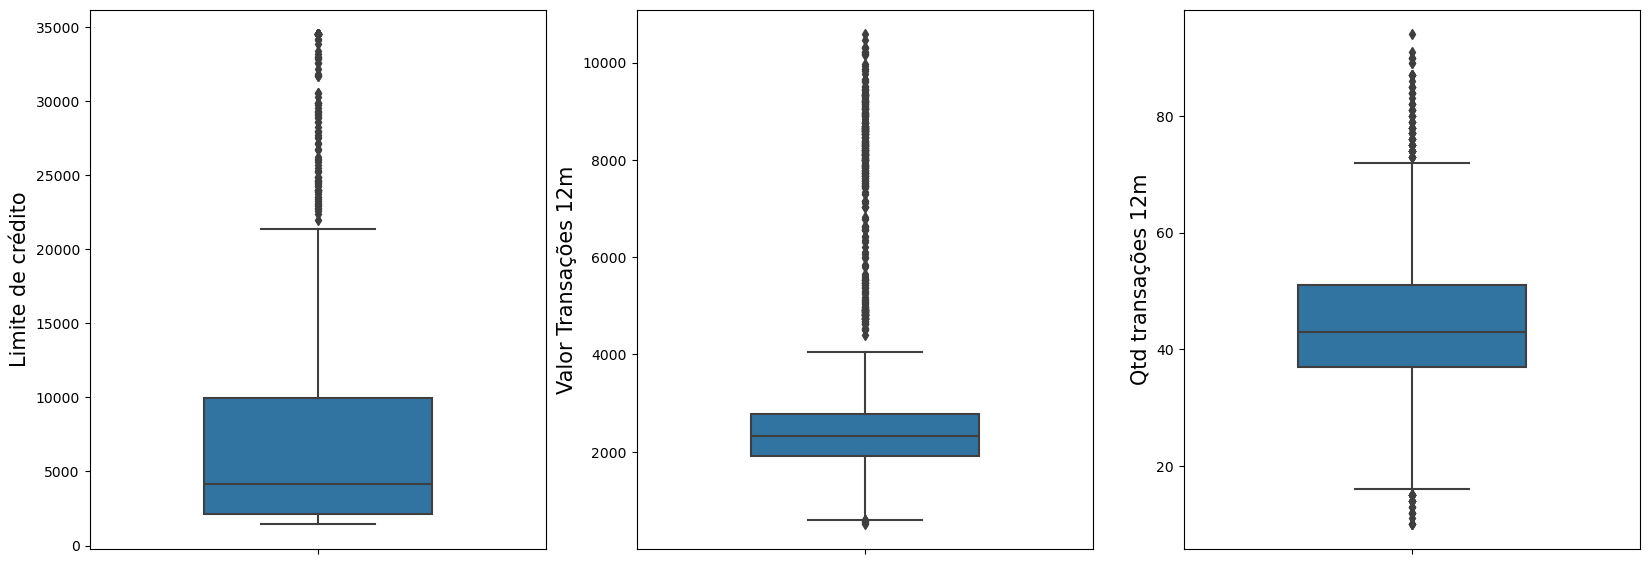

In [15]:
# Gerando bloxpot das colunas 'limite_credito', 'valor_transacoes_12m' e 'qtd_transacoes_12m'

fig, axs = plt.subplots(1, 3, figsize = (20, 7))

box_1 = sns.boxplot(data = df_default, y = 'limite_credito', ax = axs[0], width = 0.5)
box_1.set_ylabel('Limite de crédito', fontsize = 15)

box_2 = sns.boxplot(data = df_default, y = 'valor_transacoes_12m', ax = axs[1], width = 0.5)
box_2.set_ylabel('Valor Transações 12m', fontsize = 15)

box_3 = sns.boxplot(data = df_default, y = 'qtd_transacoes_12m', ax = axs[2], width = 0.5)
box_3.set_ylabel('Qtd transações 12m', fontsize = 15)


Os boxplots indicam grande quantidade de outliers nas colunas destacadas. <br>
Usando as informações fornecidas nesse Dataset e de acordo com as descrições de cada coluna, não é possível verificar se os valores entregues são fruto de erro de cálculo ou de digitação.

Portanto, será investigada a relevância do limite de crétido nesse contexto, pois, quanto maior o limite mais possibilidades de uso os clientes possuem.<br>
Antes, serão observadas as variáveis categóricas.

Text(0.5, 0, 'Tipo de cartão')

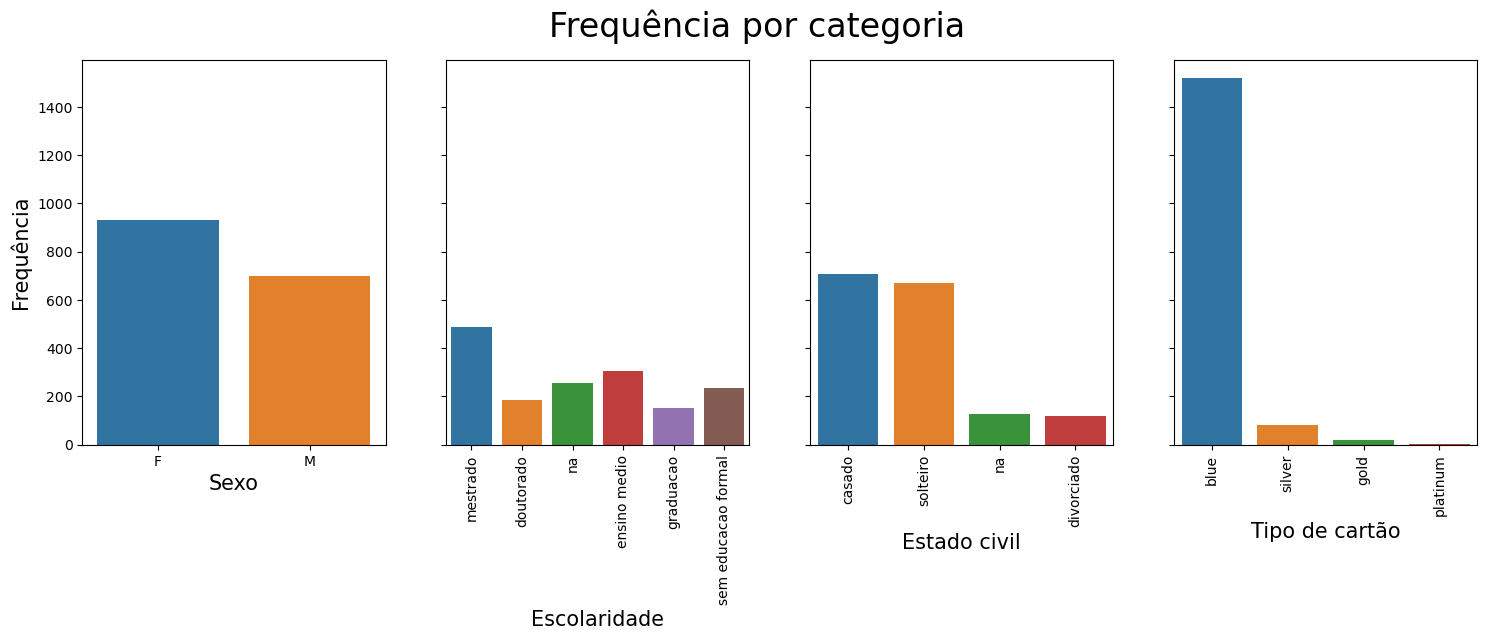

In [16]:
# Visão geral dos dados categóricos através de gráficos

fig, axs = plt.subplots(1,4, figsize = (18, 5), sharey = True)
fig.suptitle('Frequência por categoria', fontsize = 24)

g1 = sns.countplot(data = df_default, x = 'sexo', ax = axs[0])
g1.set_ylabel('Frequência', fontsize = 15)
g1.set_xlabel('Sexo', fontsize = 15)

g2 = sns.countplot(data = df_default, x = 'escolaridade', ax = axs[1])
g2.set_ylabel('')
g2.tick_params(axis='x', labelrotation=90)
g2.set_xlabel('Escolaridade', fontsize = 15)

g3 = sns.countplot(data = df_default, x = 'estado_civil', ax = axs[2])
g3.set_ylabel('')
g3.tick_params(axis='x', labelrotation=90)
g3.set_xlabel('Estado civil', fontsize = 15)

g4 = sns.countplot(data = df_default, x = 'tipo_cartao', ax = axs[3])
g4.set_ylabel('')
g4.tick_params(axis='x', labelrotation=90)
g4.set_xlabel('Tipo de cartão', fontsize = 15)

## Exploração univariada - conclusões

Estudando as variáveis categóricas separadamente, é perceptível que:<br>
Quanto ao sexo:
- Não há grande diferença entre sexos.
- A maior parte de clientes em **default** é Feminina.

Quanto à escolaridade:
- Maioria de clientes possui ensino superior e pós-graduações.
    - Importante verificar porcentagem de comparação para entender a diferença com demais clientes em **default**.
- Considerável número de clientes "na", ou seja, necessário revisar o processo de anotação de tal dado.

Quanto ao estado civil:
- Há equilíbrio entre casados e solteiros.
- Também apresenta alta quantia de 'na'.
- Clientes divorciados representam parcela pequena do todo.

Quanto ao tipo de cartão:
- Maioria esmagadora de clientes possue cartão blue.
- Há redução no número de clientes conforme progressão dos cartões, como esperado.

O impacto do limite de crétido precisa ser investigado
- Qual sexo possuí maiores limites?
- Qual a escolaridade desses clientes?
- O limite de crédito acompanha o tipo de cartão, considerando há mudanças de categoria?

# Limite de crédito e as demais variáveis

Considerando os pontos fora da curva apontados no boxplot anterior, o DataSet será agrupado conforme os quartis do limite de crédito.

In [17]:
# Definindo o agrupamento do limite de crédito

print(df_default.limite_credito.quantile([0.25, 0.5, 0.75]).round(2))
print('\n', 'Mínimo = ', df_default.limite_credito.min())
print('\n', 'Máximo = ', df_default.limite_credito.max())

0.25    2114.19
0.50    4178.03
0.75    9933.67
Name: limite_credito, dtype: float64

 Mínimo =  1438.0

 Máximo =  34516.98


In [18]:
classes = [1438.00, 2114.19, 4178.03, 9933.67, 34516.98]
labels = ['25%', '50%', '75%', 'Máx']

limites = pd.cut(x = df_default.limite_credito,
                bins = classes,
                labels = labels,
                include_lowest = True)


In [19]:
# Categorizando as variáveis numéricas para comparação com as categorias de Limite de Crédito

# Idade
labels = ['A', 'B', 'C', 'D', 'E']
freq_idade = pd.DataFrame(pd.cut(x = df_default['idade'].sort_values(), bins = 5, labels = labels, include_lowest = True))

# Dependentes
freq_dep = pd.DataFrame(pd.cut(x = df_default['dependentes'].sort_values(), bins = 5, labels = labels, include_lowest = True))

# Meses de relacionamento
freq_meses = pd.DataFrame(pd.cut(x = df_default['meses_de_relacionamento'].sort_values(), bins = 5, labels = labels, include_lowest = True))

# Quantidade de produtos
freq_produtos = pd.DataFrame(pd.cut(x = df_default['qtd_produtos'].sort_values(), bins = 5, labels = labels, include_lowest = True))

# Interações últimos 12 meses
freq_interacoes = pd.DataFrame(pd.cut(x = df_default['iteracoes_12m'].sort_values(), bins = 5, labels = labels, include_lowest = True))

# Meses inativo últimos 12 meses
freq_inativo = pd.DataFrame(pd.cut(x = df_default['meses_inativo_12m'].sort_values(), bins = 5, labels = labels, include_lowest = True))

# Valor transações últimos 12 meses
freq_transacoes = pd.DataFrame(pd.cut(x = df_default['valor_transacoes_12m'].sort_values(), bins = 5, labels = labels, include_lowest = True))

# Quanidades de trasações últimos 12 meses
freq_qnt_trasacoes = pd.DataFrame(pd.cut(x = df_default['qtd_transacoes_12m'].sort_values(), bins = 5, labels = labels, include_lowest = True))


In [20]:
# Organização prévia para os gráficos

limite_idade = pd.DataFrame(freq_idade.groupby(limites, observed=True).value_counts())
limite_idade.reset_index(inplace = True)

limite_sexo = pd.DataFrame(df_default.groupby(limites, observed=True)['sexo'].value_counts())
limite_sexo.reset_index(inplace = True)

limite_dependentes = (pd.DataFrame(freq_dep.groupby(limites, observed=True)['dependentes'].value_counts()))
limite_dependentes.reset_index(inplace = True)

limite_escolaridade = (pd.DataFrame(df_default.groupby(limites, observed=True)['escolaridade'].value_counts()))
limite_escolaridade.reset_index(inplace = True)

limite_estado_civil = (pd.DataFrame(df_default.groupby(limites, observed=True)['estado_civil'].value_counts()))
limite_estado_civil.reset_index(inplace = True)

limite_salario_anual = (pd.DataFrame(df_default.groupby(limites, observed=True)['salario_anual'].value_counts()))
limite_salario_anual.reset_index(inplace = True)

limite_cartao = (pd.DataFrame(df_default.groupby(limites, observed=True)['tipo_cartao'].value_counts()))
limite_cartao.reset_index(inplace = True)

limite_meses = (pd.DataFrame(freq_meses.groupby(limites, observed=True)['meses_de_relacionamento'].value_counts()))
limite_meses.reset_index(inplace = True)

limite_qnt_produtos = (pd.DataFrame(freq_produtos.groupby(limites, observed=True)['qtd_produtos'].value_counts()))
limite_qnt_produtos.reset_index(inplace = True)

limite_iteracoes_12m = (pd.DataFrame(freq_interacoes.groupby(limites, observed=True)['iteracoes_12m'].value_counts()))
limite_iteracoes_12m.reset_index(inplace = True)

limite_meses_inativo_12m = (pd.DataFrame(freq_inativo.groupby(limites, observed=True)['meses_inativo_12m'].value_counts()))
limite_meses_inativo_12m.reset_index(inplace = True)

limite_valor_transacoes_12m = (pd.DataFrame(freq_transacoes.groupby(limites, observed=True)['valor_transacoes_12m'].value_counts()))
limite_valor_transacoes_12m.reset_index(inplace = True)

limite_qnt_transacoes_12m = (pd.DataFrame(freq_qnt_trasacoes.groupby(limites, observed=True)['qtd_transacoes_12m'].value_counts()))
limite_qnt_transacoes_12m.reset_index(inplace = True)

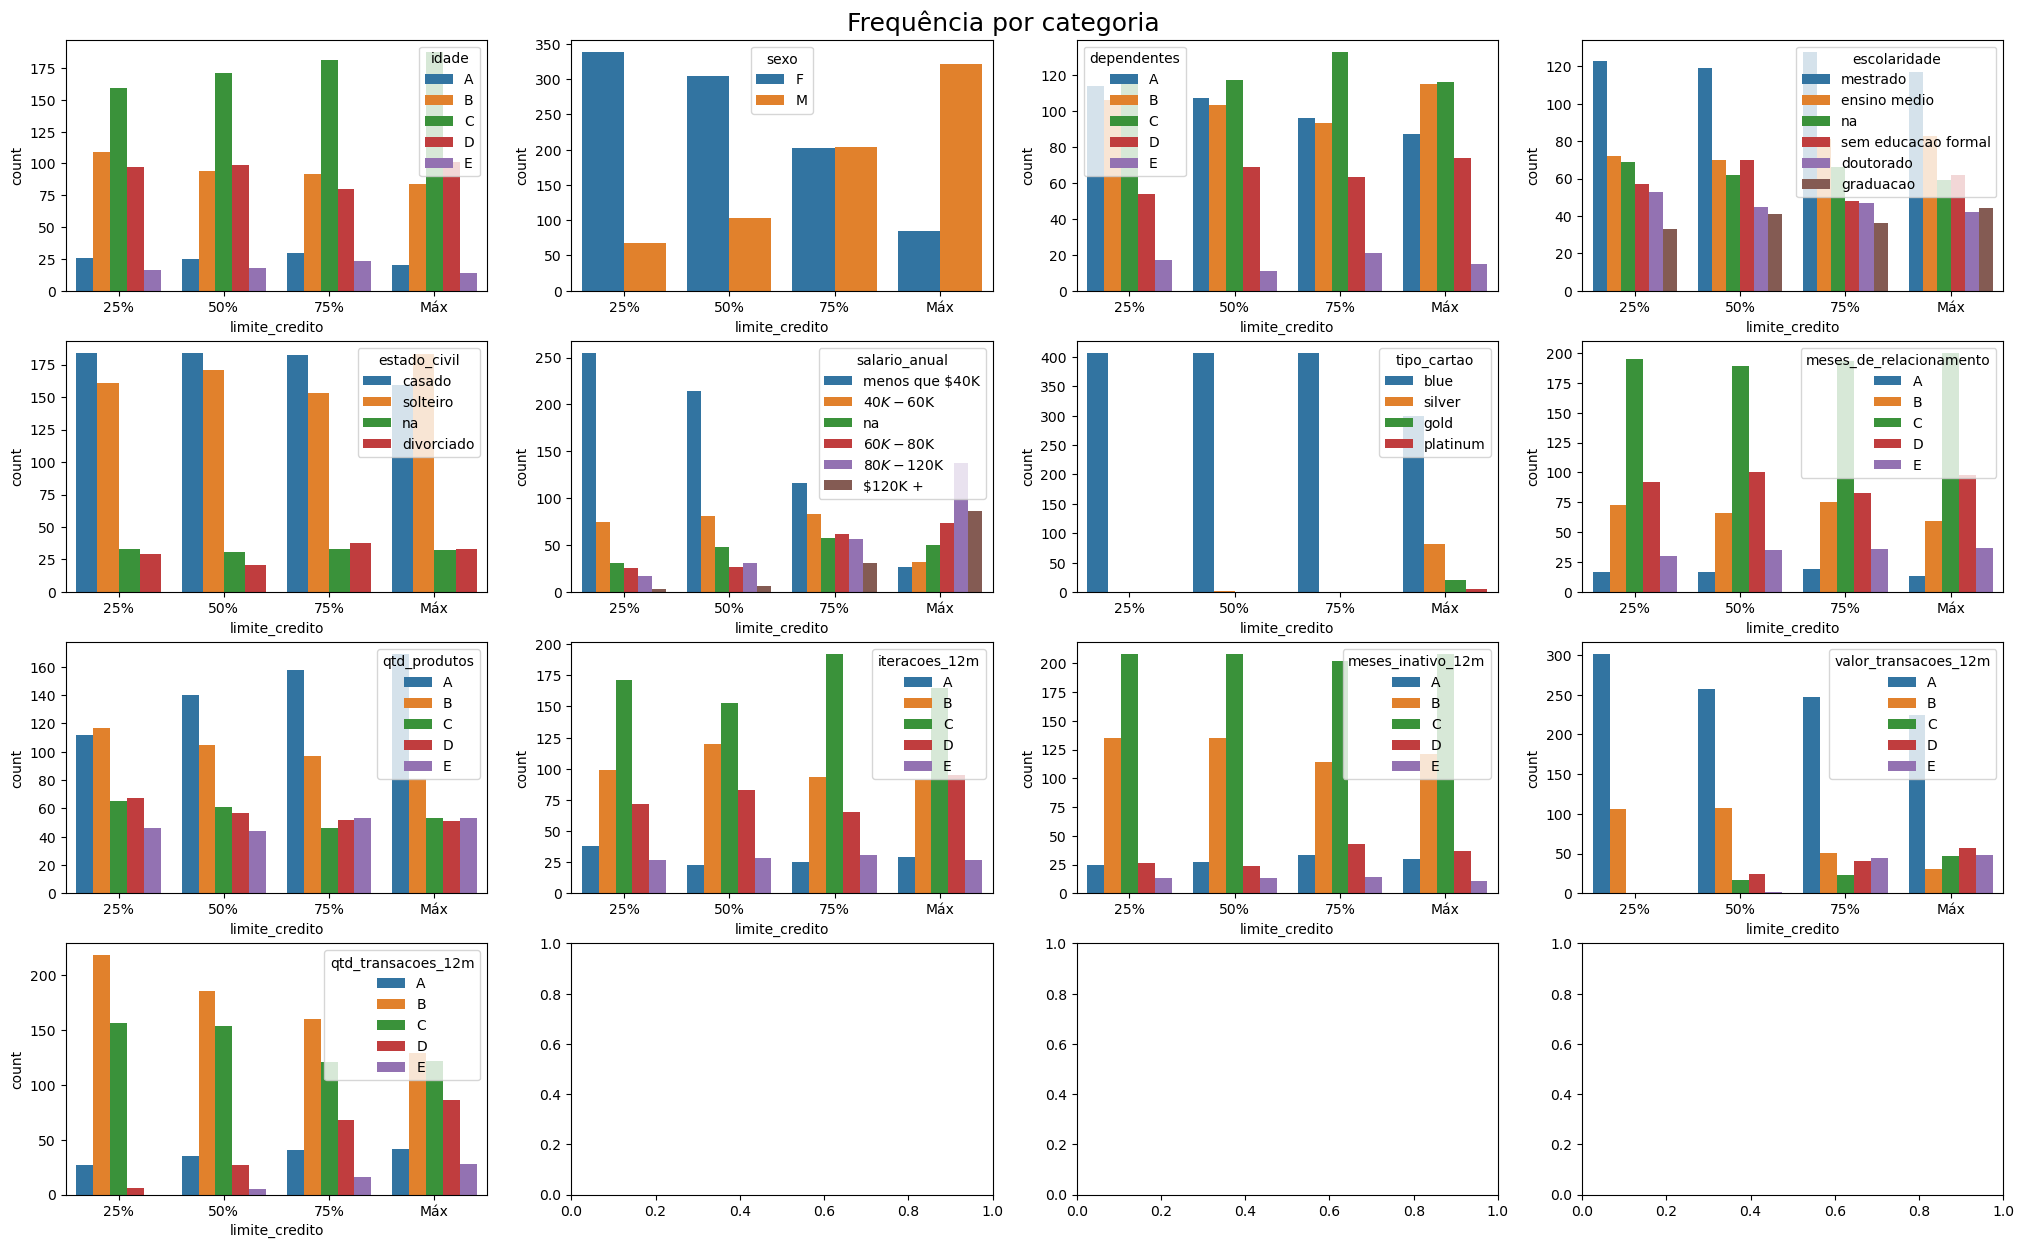

In [33]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


fig, axs = plt.subplots(4,4, figsize = (25, 15))
fig.suptitle('Frequência por categoria', fontsize = 18, y=0.9)

g1 = sns.barplot(data = limite_idade, x ='limite_credito', y = 'count', hue = 'idade', ax = axs[0, 0])

g2 = sns.barplot(data = limite_sexo, x ='limite_credito', y = 'count', hue = 'sexo', ax = axs[0, 1])

g3 = sns.barplot(data = limite_dependentes, x ='limite_credito', y = 'count', hue = 'dependentes', ax = axs[0, 2])

g4 = sns.barplot(data = limite_escolaridade, x ='limite_credito', y = 'count', hue = 'escolaridade', ax = axs[0, 3])

g5 = sns.barplot(data = limite_estado_civil, x ='limite_credito', y = 'count', hue = 'estado_civil', ax = axs[1, 0])

g6 = sns.barplot(data = limite_salario_anual, x ='limite_credito', y = 'count', hue = 'salario_anual', ax = axs[1, 1])

g7 = sns.barplot(data = limite_cartao, x ='limite_credito', y = 'count', hue = 'tipo_cartao', ax = axs[1, 2])

g8 = sns.barplot(data = limite_meses, x ='limite_credito', y = 'count', hue = 'meses_de_relacionamento', ax = axs[1, 3])

g9 = sns.barplot(data = limite_qnt_produtos, x ='limite_credito', y = 'count', hue = 'qtd_produtos', ax = axs[2, 0])

g10 = sns.barplot(data = limite_iteracoes_12m, x ='limite_credito', y = 'count', hue = 'iteracoes_12m', ax = axs[2, 1])

g11 = sns.barplot(data = limite_meses_inativo_12m, x ='limite_credito', y = 'count', hue = 'meses_inativo_12m', ax = axs[2, 2])

g12 = sns.barplot(data = limite_valor_transacoes_12m, x ='limite_credito', y = 'count', hue = 'valor_transacoes_12m', ax = axs[2, 3])

g7 = sns.barplot(data = limite_qnt_transacoes_12m, x ='limite_credito', y = 'count', hue = 'qtd_transacoes_12m', ax = axs[3, 0])



## Análise dos gráficos

Para todas as variáveis quantitativas que foram categorizadas, vale a relação: A < B < C < D < E <br>
Vale ressaltar que a variável Limite de crédito foi dividida em seus quartis para efeito de comparação com as demais variáveis.

Idade x Limite de crédito
- Em todos os segmentos, prepondera clientes da categoria C, isto é, de 42.8 até 51.2 anos, seguido de clientes das categorias B(34.4 até 42.8 anos) e D(51.8 até 59.6 anos).
- Com essa análise, percebe-se que o limite de crédito segue comportamento padrão em relação à idade dos clientes, isto é, ter mais ou menos idade não traz mudanças significativas ao limite disponível.

Sexo X Limite de crédito
- Com o gráfico fica nítida a mudança de comportamento do limite de crédito em relação ao sexo dos clientes. 
- Considerando que, em função das análises ja feitas, há desconfiança em relação à quem tem limites exorbitantes, tal grupo é composto majoriataiamente por homens.
- Vale lembrar que, como mostrado anteriormente, há mais mulheres que homens em **default**, mas quem possuí os maiores limites de crétido, são os homens e os menores limites, as mulheres.

Dependentes X Limite de crédito
- Assim como acontece com a idade, ter mais ou menos dependentes não traz mudanças significativas em relação ao limite de crédito disponível.

Escolaridade X Limite de crédito
- A escolaridade também segue comportamento muito similar em todos os quartis, indicando que ter mais ou menos limite não está relacionado à ter maior ou menor escolaridade.

Estado civil X Limite de crédito
- O padrão de clientes casados e solteiros serem marioria esmagadora apresenta-se em todos os segmentos.
- É outra categoria que não sofre mudanças significativas em relação ao limite de crédito, mas é curioso o fato de que quem possui os maiores limites sejam os soteiros, diferente dos demais quartis.

Salário anual X Limite de crédito
- Aqui há considerável mudança de comportamento de acordo com o limite de crédito disponível.
- De forma geral, menor salário, menor limite.
- Como apontado anteriormente, a quantia de "na" é problemática e, nessa variável, saber essa informação pode mudar significativamente os resultados.

Tipo de cartão X Limite de crédito
- Prepondera quase de de forma unânime o cartão blue, mesmo nos limites mais altos.
- Os demais tipos de cartão aparecerem mais para quem tem limites maiores é esperado, assim como a quantia de clientes ser decrescente também está de acordo com as espectativas.

Meses de relacionamento X Limite de crédito
- De forma muito semelhante à variável idade, há padrão na distribuição dos clientes em relação aos meses de relacionamento com o banco.
- Com isso, entende-se que ter mais ou menos limite não está atrelado ao tempo de relacionamento.

Quantidade de produtos X Limite de crédito
- Mais uma variável que mantém certo padrão em todos os segmentos.
- O fato de ter mais ou menos limite não implica mais ou menos produtos contratados.

Interações nos últimos 12 meses X Limite de crédito
- Novamente uma variável que mantém certo padrão de comportamento.
- O fato de ter mais ou menos limite não implica mais ou menos interações.

Meses inativo nos últimos 12 meses X Limite de crédito
- Outra variável com padrão de comportamento nos segmentos.
- O fato de ter mais ou menos limite não implica mais ou menos meses inativos.

Valor de transações nos últimos 12 meses X Limite de crédito
- Prevalece em todos os segmentos transações da categoria A (de 500.00 até 2524.9 reais).
- Há mudança nas demais categorias, mas seguem muito abaixo da primeira.
- Como esperado, quanto maiores os limites disponíveis, mais transações de valores maiores são feitas.

Quantidade de transações nos últimos 12 meses X Limite de crédito
- Essa variável também apresenta certo padrão de comportamento nos segmentos.
- Pode-se concluir que quanto maior o limite mais trabsações são realizadas, mas sem mudanças drásticas de comportamento.
- O fato de ter mais ou menos limite não implica mais ou menos transações.

# Conclusões

Nesse estudo, ateve-se o foco nos clientes em **default**, com o objetivo de encontrar padrões de comportamento.<br>
Assim, concluí-se alguns pontos:
- A quantia de valores faltantes nas categorias 'Escolaridade' e 'Salário anual' são preocupantes, pois é um dado que pode modificar a interpretação das variáveis.

- O comportamento das variáveis 'limite_credito', 'valor_transacoes_12m' e 'qtd_transacoes_12m' geraram estranhamento, mas nesse estudo ficou em destaque o 'Limite de crédito', visto que quanto mais crédito, mais possibilidades abrem-se aos clientes e maiores podem ser os impactos para o banco.

- A partir dessa escolha, observou-se que as variáveis 'sexo' e 'salário anual' apresentam mais mudanças em relação ao limite disponível, ou seja, é um padrão comportamental a ficar de olho em clientes em **default**, pois como dito, quanto maiores os limites, maiores podem ser os impactos.


Fica em aberto o estudo referente ao 'valor_transacoes_12m', que apresentou grande número de candidatos a outliers e carece aprofundamento.<br>
Algumas perguntas para estudos futuros:
- Quem faz as maiores transações?
- Como está a relação com o banco?
- Quem faz os maiores valores, faz em quantas transações?